In [1]:
from fbprophet import Prophet
import pandas as pd

homedepot = pd.read_csv('homedepot.googletrends.csv', parse_dates=['period'])

In [2]:
homedepot.head()

,Unnamed: 0,date,value,period,onediffvalue
0,1820,Oct 01 2018,15348.962257,2018-10-01,NaN
1,1819,Sep 30 2018,19085.352674,2018-09-30,3736.390417
2,1818,Sep 29 2018,19124.417411,2018-09-29,39.064737
3,1817,Sep 28 2018,14549.426074,2018-09-28,-4574.991337
4,1816,Sep 27 2018,14161.482495,2018-09-27,-387.943579


In [3]:
prophetdataframe = pd.DataFrame()

In [4]:
prophetdataframe['ds'] = homedepot['period']
prophetdataframe['y'] = homedepot['value']

In [5]:
m = Prophet()

In [6]:
m.fit(prophetdataframe)

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
future = m.make_future_dataframe(periods=365)

In [8]:
future.tail()

,ds
2181,2019-09-27
2182,2019-09-28
2183,2019-09-29
2184,2019-09-30
2185,2019-10-01


In [9]:
forecast = m.predict(future)

In [15]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2181,2019-09-27,19909.129324,14037.420952,18770.471016,19747.770336,20068.654186,-3551.341125,-3551.341125,-3551.341125,-1010.422694,-1010.422694,-1010.422694,-2540.918431,-2540.918431,-2540.918431,0.0,0.0,0.0,16357.788199
2182,2019-09-28,19911.280654,17684.541556,22228.122523,19749.050254,20071.325697,151.681618,151.681618,151.681618,2724.097623,2724.097623,2724.097623,-2572.416005,-2572.416005,-2572.416005,0.0,0.0,0.0,20062.962272
2183,2019-09-29,19913.431984,18702.091310,22935.811575,19750.072589,20073.927893,822.711639,822.711639,822.711639,3402.094883,3402.094883,3402.094883,-2579.383244,-2579.383244,-2579.383244,0.0,0.0,0.0,20736.143623
2184,2019-09-30,19915.583314,15027.998196,19168.547708,19751.325663,20076.354192,-2787.707930,-2787.707930,-2787.707930,-225.234370,-225.234370,-225.234370,-2562.473560,-2562.473560,-2562.473560,0.0,0.0,0.0,17127.875384
2185,2019-10-01,19917.734644,13646.638480,17999.697627,19752.907878,20078.780490,-4052.566933,-4052.566933,-4052.566933,-1529.569830,-1529.569830,-1529.569830,-2522.997103,-2522.997103,-2522.997103,0.0,0.0,0.0,15865.167711


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


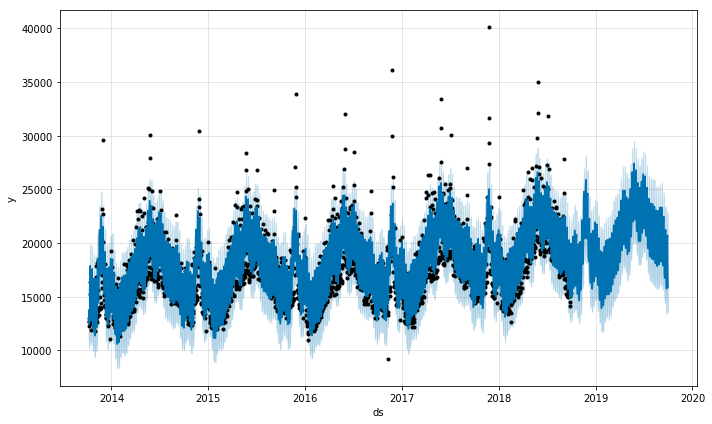

In [10]:
fig1 = m.plot(forecast)

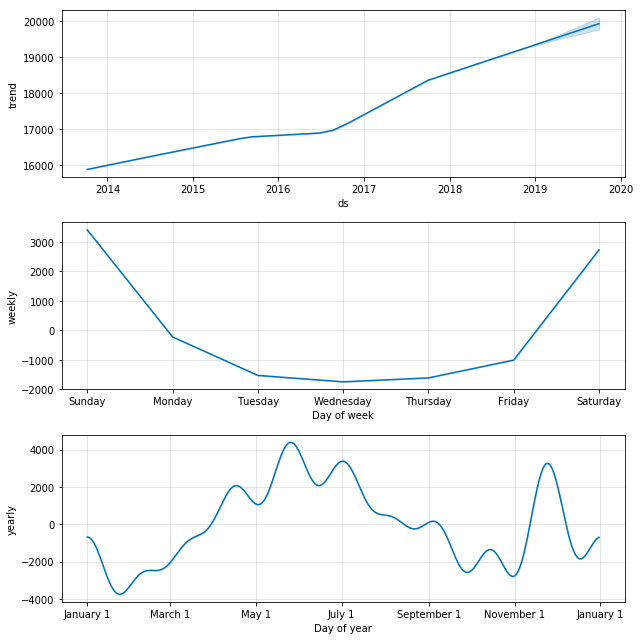

In [11]:
fig2 = m.plot_components(forecast)

In [12]:
erroranalytics = m.predict(prophetdataframe)

In [1]:
erroranalytics['value'] = prophetdataframe['y']
erroranalytics['residuals'] = erroranalytics['value'] - erroranalytics['yhat']
erroranalytics['absoluteresiduals'] = abs(erroranalytics['residuals'])

erroranalytics.head()

NameError: name 'prophetdataframe' is not defined

In [18]:
totalerror = erroranalytics['absoluteresiduals'].sum()

NameError: name 'erroranalytics' is not defined

In [19]:
print(totalerror)

NameError: name 'totalerror' is not defined

In [ ]:
print(totalerror/len(erroranalytics))

In [ ]:
erroranalytics['value'].describe()